# The main purpose of this project was to leverage Machine Learning models to best predict the customers purchase value prediction

The 2 machine learning models used here are:-

1. Linear Regression
2. K Nearest Neighbours

In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np

#Importing the plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

In [2]:
df = pd.read_csv('Black Friday.csv')

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,NaN,NaN,490


In [5]:
# Finding unique values for each column
df.apply(lambda x: len(x.unique()))

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               18
Product_Category_3               16
Purchase                      18105
dtype: int64

# Exploratory data analysis

/var/folders/qq/8k633c556yb1r1jk167bnvfw0000gn/T/ipykernel_13250/4013345734.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['Purchase'], kde=True, bins=25) #Distplot to for continuous variables


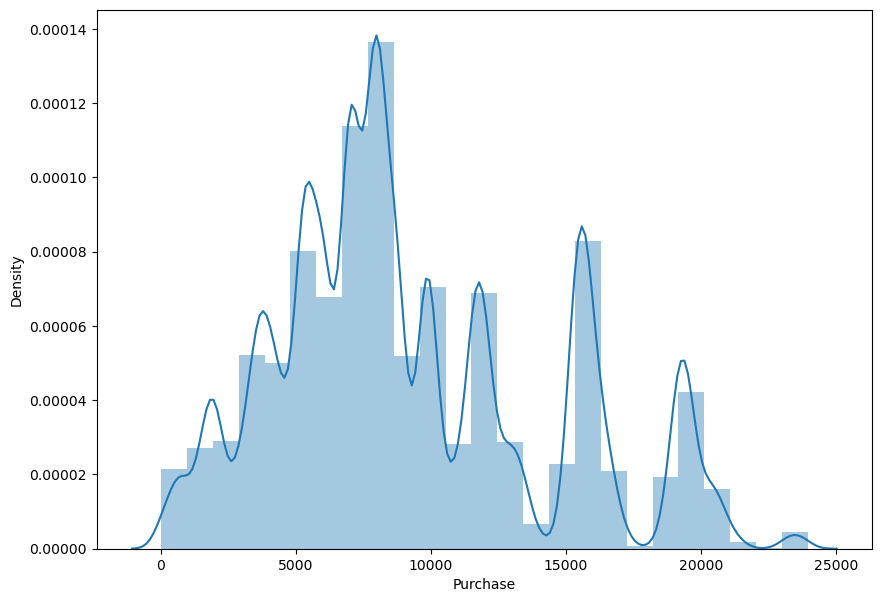

In [6]:
plt.figure(figsize=(10,7))
sns.distplot(x=df['Purchase'], kde=True, bins=25) #Distplot to for continuous variables
plt.xlabel('Purchase')
plt.show()

<Axes: xlabel='Occupation', ylabel='count'>

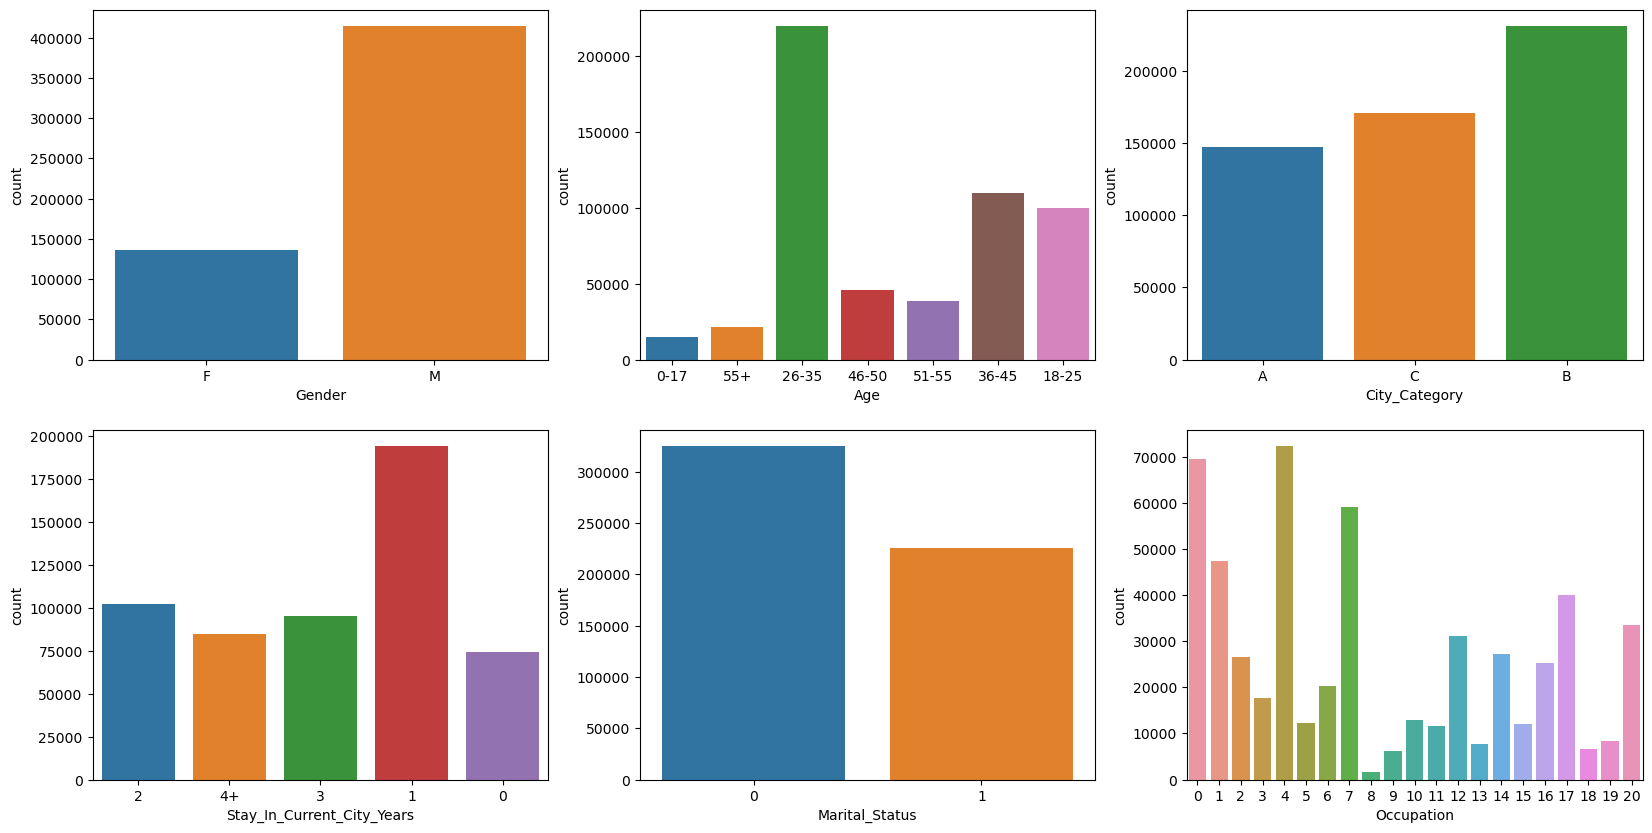

In [7]:
fig, axs = plt.subplots(2,3, figsize=(20,10))

sns.countplot(x=df['Gender'], ax=axs[0,0])
sns.countplot(x=df['Age'], ax=axs[0,1])
sns.countplot(x=df['City_Category'], ax=axs[0,2])
sns.countplot(x=df['Stay_In_Current_City_Years'], ax=axs[1,0])
sns.countplot(x=df['Marital_Status'], ax=axs[1,1])
sns.countplot(x=df['Occupation'], ax=axs[1,2])

# Product category analysis

Text(0.5, 0, 'Product Category 3')

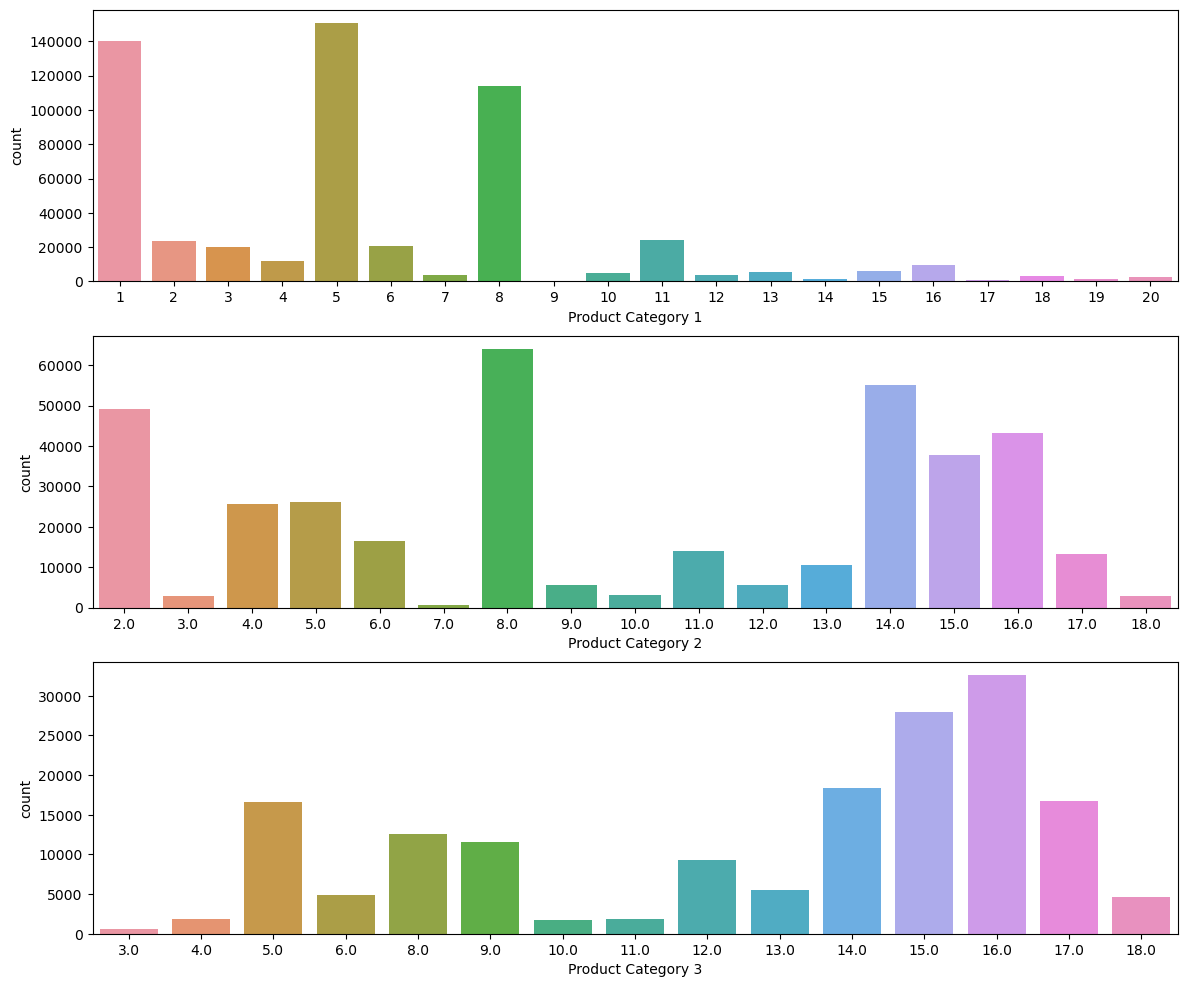

In [8]:
fig, axs = plt.subplots(3, figsize=(14,12))

sns.countplot(x=df['Product_Category_1'], ax=axs[0])
axs[0].set_xlabel('Product Category 1')

sns.countplot(x=df['Product_Category_2'], ax=axs[1])
axs[1].set_xlabel('Product Category 2')

sns.countplot(x=df['Product_Category_3'], ax=axs[2])
axs[2].set_xlabel('Product Category 3')

# Bivariate analysis

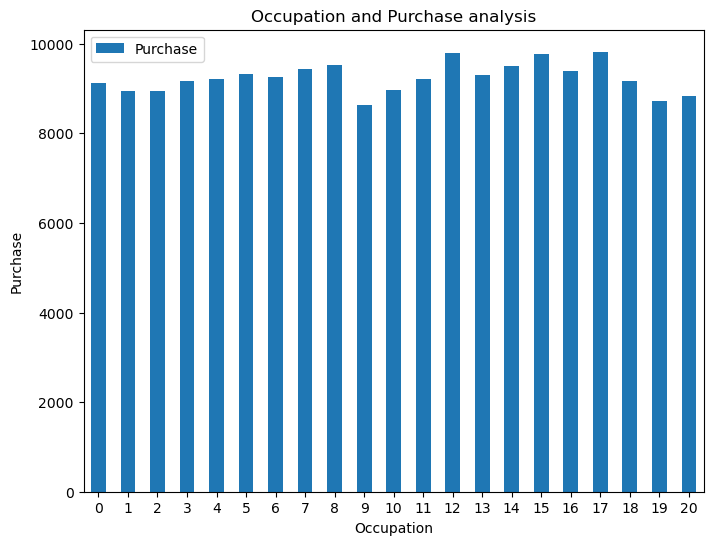

In [9]:
occupation_plot = df.pivot_table(index='Occupation', values='Purchase', aggfunc=np.mean)
occupation_plot.plot(kind='bar', figsize=(8,6))
plt.xlabel('Occupation')
plt.ylabel('Purchase')
plt.title('Occupation and Purchase analysis')
plt.xticks(rotation=0)
plt.show()

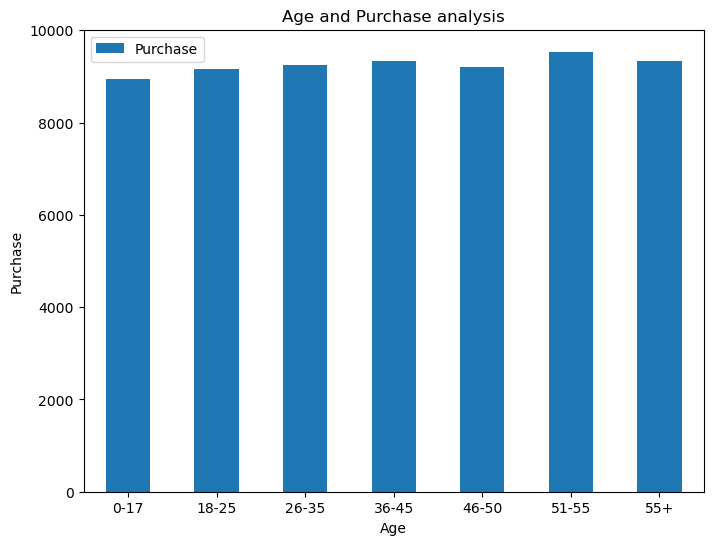

In [10]:
age_plot = df.pivot_table(index='Age', values='Purchase', aggfunc=np.mean)
age_plot.plot(kind='bar', figsize=(8,6))
plt.xlabel('Age')
plt.ylabel('Purchase')
plt.title('Age and Purchase analysis')
plt.xticks(rotation=0)
plt.show()

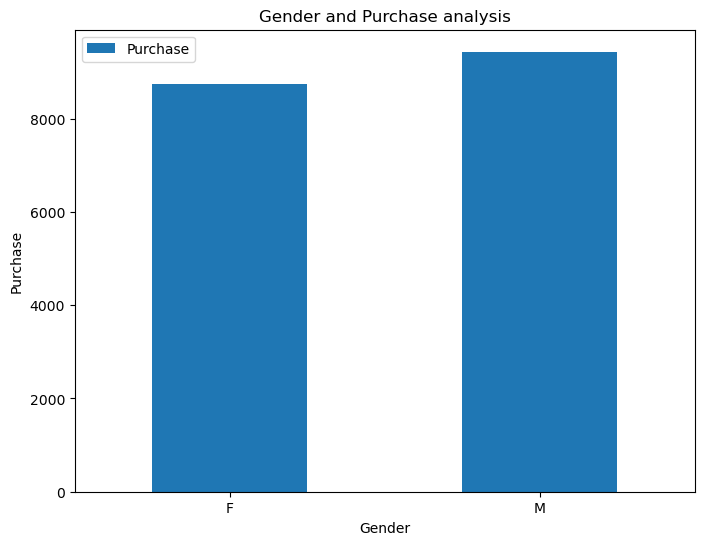

In [11]:
gender_plot = df.pivot_table(index='Gender', values='Purchase', aggfunc=np.mean)
gender_plot.plot(kind='bar', figsize=(8,6))
plt.xlabel('Gender')
plt.ylabel('Purchase')
plt.title('Gender and Purchase analysis')
plt.xticks(rotation=0)
plt.show()

# Data Preprocessing

In [12]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [13]:
df['Product_Category_2'].fillna(df['Product_Category_2'].median(), inplace=True)
df['Product_Category_3'].fillna(df['Product_Category_3'].median(), inplace=True)

In [14]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [15]:
df['Product_Category_3'].value_counts()

14.0    401675
16.0     32636
15.0     28013
17.0     16702
5.0      16658
8.0      12562
9.0      11579
12.0      9246
13.0      5459
6.0       4890
18.0      4629
4.0       1875
11.0      1805
10.0      1726
3.0        613
Name: Product_Category_3, dtype: int64

In [16]:
df['Product_Category_2'].value_counts()

9.0     179331
8.0      64088
14.0     55108
2.0      49217
16.0     43255
15.0     37855
5.0      26235
4.0      25677
6.0      16466
11.0     14134
17.0     13320
13.0     10531
12.0      5528
10.0      3043
3.0       2884
18.0      2770
7.0        626
Name: Product_Category_2, dtype: int64

In [17]:
#Encoding values using dict

gender_dict = {'F': 0, 'M': 1}
df['Gender'] = df['Gender'].apply(lambda x: gender_dict[x])

In [18]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,9.0,14.0,8370
1,1000001,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0-17,10,A,2,0,12,9.0,14.0,1422
3,1000001,P00085442,0,0-17,10,A,2,0,12,14.0,14.0,1057
4,1000002,P00285442,1,55+,16,C,4+,0,8,9.0,14.0,7969


In [19]:
#One hot encoding

cols = ['Age', 'City_Category', 'Stay_In_Current_City_Years']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [20]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,9.0,14.0,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,0,2,0,12,9.0,14.0,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,14.0,1057
4,1000002,P00285442,1,6,16,2,4,0,8,9.0,14.0,7969


In [21]:
df['Age'].value_counts()

2    219587
3    110013
1     99660
4     45701
5     38501
6     21504
0     15102
Name: Age, dtype: int64

In [22]:
df['City_Category'].value_counts()

1    231173
2    171175
0    147720
Name: City_Category, dtype: int64

In [23]:
df['Stay_In_Current_City_Years'].value_counts()

1    193821
2    101838
3     95285
4     84726
0     74398
Name: Stay_In_Current_City_Years, dtype: int64

# Correlation Matrix

/var/folders/qq/8k633c556yb1r1jk167bnvfw0000gn/T/ipykernel_13250/3316219031.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

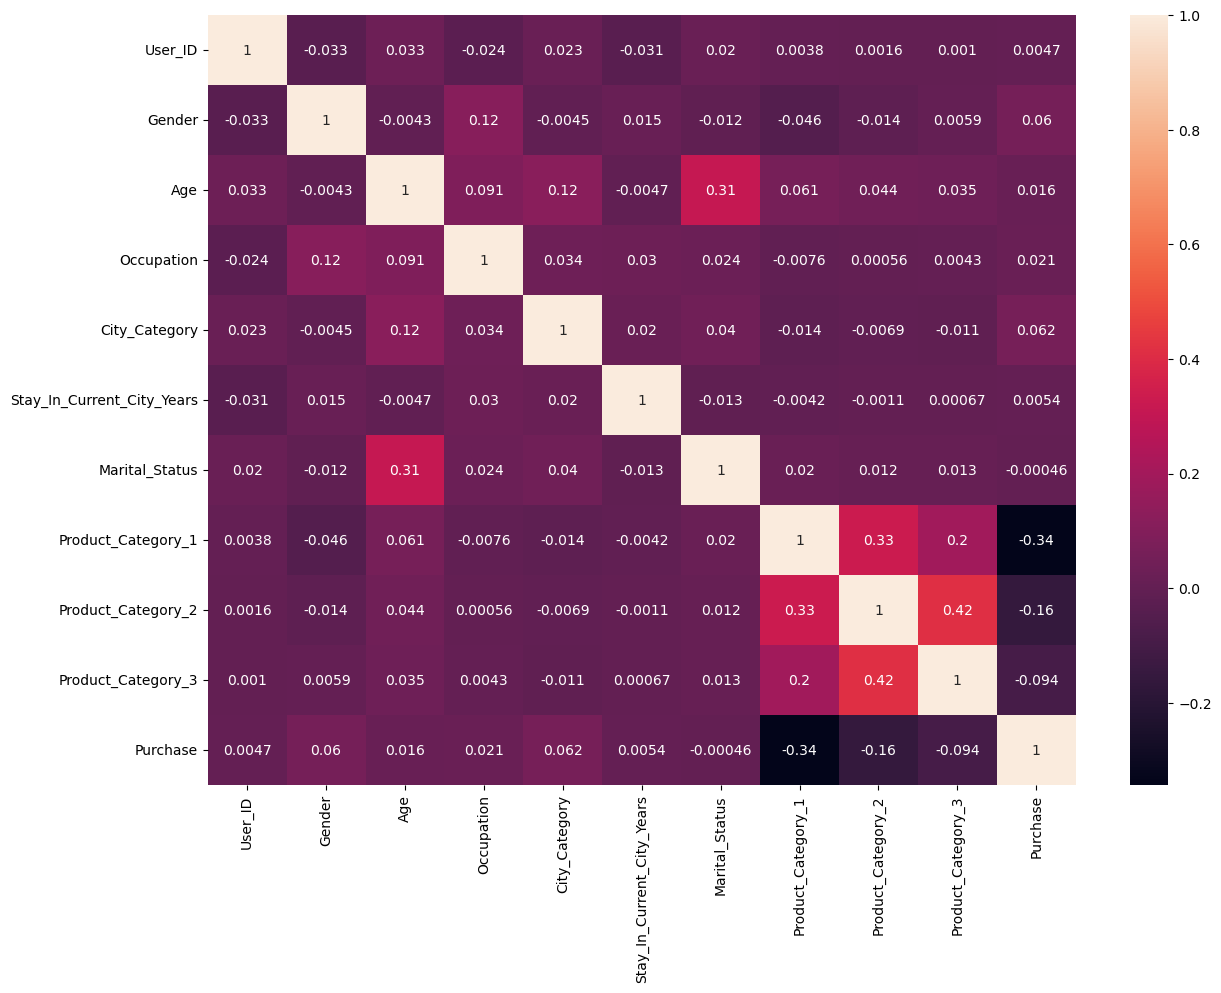

In [24]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True)

# Scaling

In [25]:
df = df.drop(['Product_ID','User_ID'], axis=1)

In [26]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [27]:
X = pd.DataFrame(scaler.transform(df), index=df.index, columns=df.columns)
X.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,-1.746513,-1.844248,0.294864,-1.371516,0.109801,-0.833018,-0.610809,-0.136401,0.171658,-0.177973
1,-1.746513,-1.844248,0.294864,-1.371516,0.109801,-0.833018,-1.118912,-0.846289,0.171658,1.181756
2,-1.746513,-1.844248,0.294864,-1.371516,0.109801,-0.833018,1.675656,-0.136401,0.171658,-1.561193
3,-1.746513,-1.844248,0.294864,-1.371516,0.109801,-0.833018,1.675656,1.046745,0.171658,-1.633858
4,0.572570,2.588277,1.214734,1.259336,1.660861,-0.833018,0.659449,-0.136401,0.171658,-0.257805


In [28]:
X.drop('Purchase', axis=1)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,-1.746513,-1.844248,0.294864,-1.371516,0.109801,-0.833018,-0.610809,-0.136401,0.171658
1,-1.746513,-1.844248,0.294864,-1.371516,0.109801,-0.833018,-1.118912,-0.846289,0.171658
2,-1.746513,-1.844248,0.294864,-1.371516,0.109801,-0.833018,1.675656,-0.136401,0.171658
3,-1.746513,-1.844248,0.294864,-1.371516,0.109801,-0.833018,1.675656,1.046745,0.171658
4,0.572570,2.588277,1.214734,1.259336,1.660861,-0.833018,0.659449,-0.136401,0.171658
...,...,...,...,...,...,...,...,...,...
550063,0.572570,1.849523,0.754799,-0.056090,-0.665728,1.200454,3.708069,-0.136401,0.171658
550064,-1.746513,-0.366739,-1.084943,1.259336,0.885331,-0.833018,3.708069,-0.136401,0.171658
550065,-1.746513,-0.366739,1.061423,-0.056090,1.660861,1.200454,3.708069,-0.136401,0.171658
550066,-1.746513,2.588277,-1.084943,1.259336,0.109801,-0.833018,3.708069,-0.136401,0.171658


In [29]:
y = df['Purchase']

In [30]:
# Call the model
model = LinearRegression()

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# fit the model
model.fit(X_train, y_train)

# predict the results
pred = model.predict(X_test)

In [31]:
rmse = np.sqrt(mean_squared_error(y_test, pred))
r2 = r2_score(y_test, pred)

print('The rmse score for Linear Regression is:', rmse)
print('The r2 score for Linear Regression is:', r2)

The rmse score for Linear Regression is: 8.003470899465898e-12
The r2 score for Linear Regression is: 1.0


In [32]:
# Let us explore the coefficients for each of the independent attributes ie in y = mx + b

for idx, col_name in enumerate(X_train.columns):
    print('The coefficients of {} is {}.'. format(col_name, model.coef_[idx]))

The coefficients of Gender is 1.2053917731572835e-12.
The coefficients of Age is 4.547473508864641e-13.
The coefficients of Occupation is -2.2737367544323206e-12.
The coefficients of City_Category is 2.4655832930875476e-12.
The coefficients of Stay_In_Current_City_Years is -1.4495071809506044e-12.
The coefficients of Marital_Status is -3.126388037344441e-13.
The coefficients of Product_Category_1 is -4.547473508864641e-12.
The coefficients of Product_Category_2 is -5.684341886080801e-13.
The coefficients of Product_Category_3 is 4.689582056016661e-13.
The coefficients of Purchase is 5023.060827959921.


In [33]:
intercept = model.intercept_

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 9263.968712959126


# KNN

In [34]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
prediction_knn = knn.predict(X_test)

In [35]:
rmse = np.sqrt(mean_squared_error(y_test, prediction_knn))
r2 = r2_score(y_test, prediction_knn)

print('The rmse score for KNN Algorithm is:', rmse)
print('The r2 score for KNN Algorithm is::', r2)

The rmse score for KNN Algorithm is: 587.0970435777851
The r2 score for KNN Algorithm is:: 0.986297120982494


# Final Statistical Model

In [36]:
final_predictions = (0.5*pred +
                     0.5*prediction_knn)

In [37]:
final_predictions

array([18483.4, 15529.6,  8056.3, ...,  7022. ,  4580.1, 15709.6])

In [38]:
rmse = np.sqrt(mean_squared_error(y_test, final_predictions))
r2 = r2_score(y_test, final_predictions)

print('The rmse score for the final model is:', rmse)
print('The r2 score for the final model is:', r2)

The rmse score for the final model is: 293.5485217888936
The r2 score for the final model is: 0.9965742802456234


In [39]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': final_predictions})

In [40]:
results.head()

,Actual,Predicted
84432,19142,18483.4
72724,15513,15529.6
197032,7802,8056.3
353704,15455,15498.0
91198,4492,4702.2


# Visualising the results

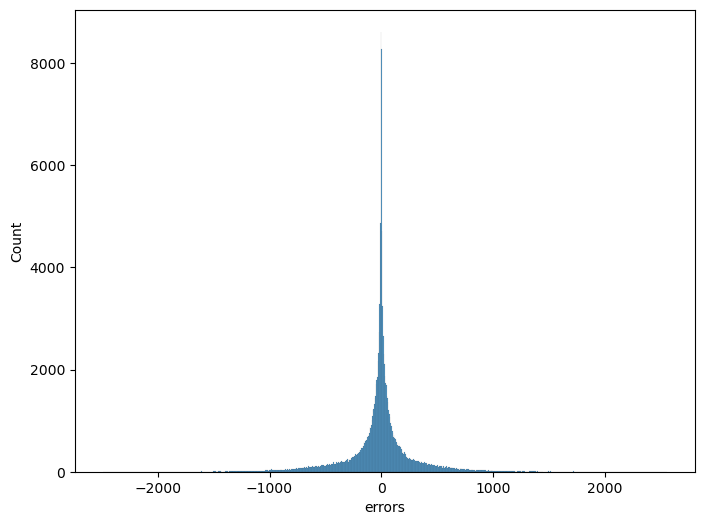

In [41]:
plt.figure(figsize=(8,6))
x1 = y_test - final_predictions
sns.histplot(x1)
plt.xlabel('errors')
plt.show()